# Assignment 3
# Submitted By:  Arshad Ali(214102301)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import random
import math

## 1

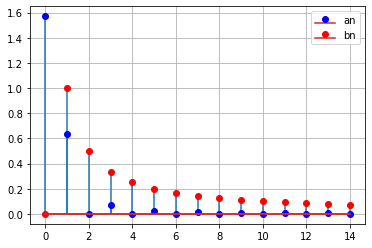

In [11]:
def fn(x):
    if(x>=0):
        return np.pi-x
    else: 
        return 0

T = 2*np.pi    
a0 = [2*quad(fn,-np.pi,np.pi)[0]/T for n in range(1,11)]
an = [2*quad(lambda x,n : fn(x)*np.cos(2*np.pi*n*x/T),-np.pi,np.pi,args=n)[0]/T for n in range(1,15)]
bn = [2*quad(lambda x,n : fn(x)*np.sin(2*np.pi*n*x/T),-np.pi,np.pi,args=n)[0]/T for n in range(1,15)]

an = [a0[0]] + an
bn = [0] + bn

n = [i for i in range(0,15)]

plt.stem(n,an,markerfmt='bo',label='an')
plt.stem(n,bn,markerfmt='ro',label='bn')
plt.legend()
plt.grid()

## 2

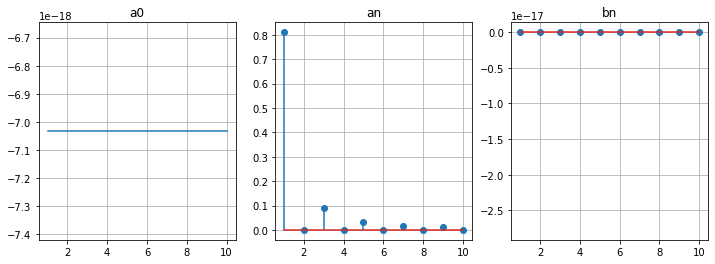

In [3]:
def sawtooth(x):
    if x>=0 and x<=1:
        return 1-2*x
    elif x>=-1 and x<=0 :
        return 1+2*x
    else:
        return 0
T = 2
a0 = [2*quad(sawtooth,-1,1)[0]/T for n in range(1,11)]
an = [2*quad(lambda x,n : sawtooth(x)*np.cos(2*np.pi*n*x/T),-1,1,args=n)[0]/T for n in range(1,11)]
bn = [2*quad(lambda x,n : sawtooth(x)*np.sin(2*np.pi*n*x/T),-1,1,args=n)[0]/T for n in range(1,11)]

n = [i for i in range(1,11)]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(n,a0)
axes[0].set_title("a0")
axes[0].grid()

axes[1].stem(n,an)
axes[1].set_title("an")
axes[1].grid()

axes[2].stem(n,bn)
axes[2].set_title("bn")
axes[2].grid()

## 2(b)

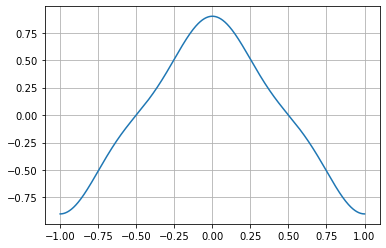

In [4]:
def construct(x,n,a0,an,bn):
    f = a0[0]/2
    for i in range(1,n+1):
        f += an[i-1]*np.cos(i*np.pi*x) + bn[i-1]*np.sin(i*np.pi*x)
    return f

x = np.linspace(-1,1,1000)
f = [construct(i,3,a0,an,bn) for i in x]
plt.plot(x,f)
plt.grid()

## 2(c)

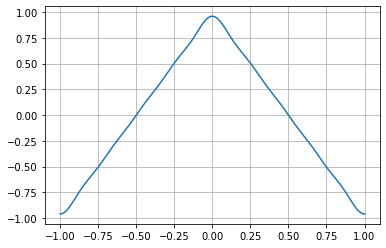

In [5]:
def construct(x,n,a0,an,bn):
    f = a0[0]/2
    for i in range(1,n+1):
        f += an[i-1]*np.cos(i*np.pi*x) + bn[i-1]*np.sin(i*np.pi*x)
    return f

x = np.linspace(-1,1,1000)
f = [construct(i,9,a0,an,bn) for i in x]
plt.plot(x,f)
plt.grid()

**As we are increasing the value of n for partial sum, the approximated function is getting closer to the actual function.**

## 3

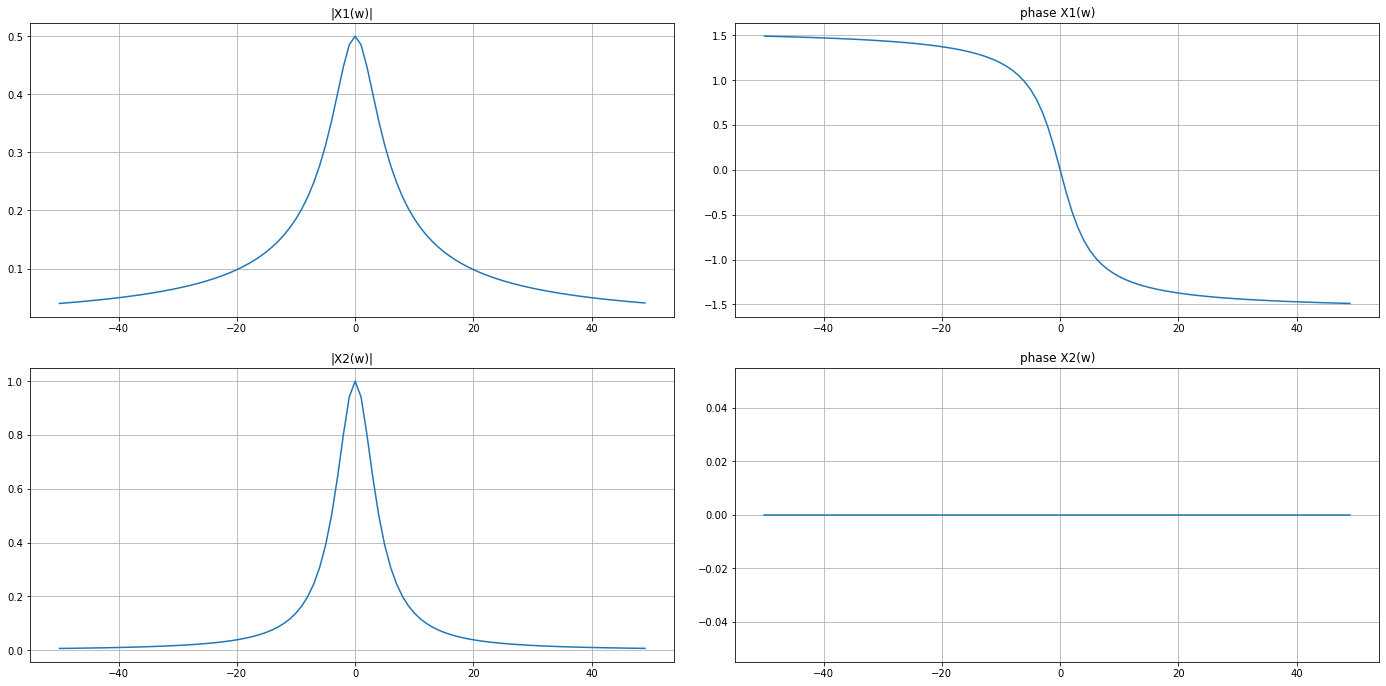

In [6]:
def x1(t,A,a):
    if(t>0):
        return A*np.exp(-a*t)
    else:
        return 0

def x2(t,A,a):
    return A*np.exp(-a*abs(t))

X1_w_real = np.array([quad(lambda t,w : x1(t,2,4)*np.cos(w*t),-np.inf,np.inf,args=w)[0] for w in range(-50,50)])
X1_w_img = np.array([quad(lambda t,w : x1(t,2,4)*np.sin(w*t),-np.inf,np.inf,args=w)[0] for w in range(-50,50)])

X2_w_real = np.array([quad(lambda t : x2(t,2,4)*np.cos(w*t),-np.inf,np.inf)[0] for w in range(-50,50)])
X2_w_img = np.array([quad(lambda t : x2(t,2,4)*np.sin(w*t),-np.inf,np.inf)[0] for w in range(-50,50)])

X1_mag = np.sqrt(X1_w_real**2 + X1_w_img**2)
X2_mag = np.sqrt(X2_w_real**2 + X2_w_img**2)

X1_phase = np.arctan(-X1_w_img/X1_w_real)
X2_phase = np.arctan(X2_w_img/X2_w_real)

w = [i for i in range(-50,50)]

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.tight_layout(pad=3)
axes[0][0].plot(w,X1_mag)
axes[0][0].set_title("|X1(w)|")
axes[0][0].grid()

axes[0][1].plot(w,X1_phase)
axes[0][1].set_title("phase X1(w)")
axes[0][1].grid()

axes[1][0].plot(w,X2_mag)
axes[1][0].set_title("|X2(w)|")
axes[1][0].grid()

axes[1][1].plot(w,X2_phase)
axes[1][1].set_title("phase X2(w)")
axes[1][1].grid()

## 4

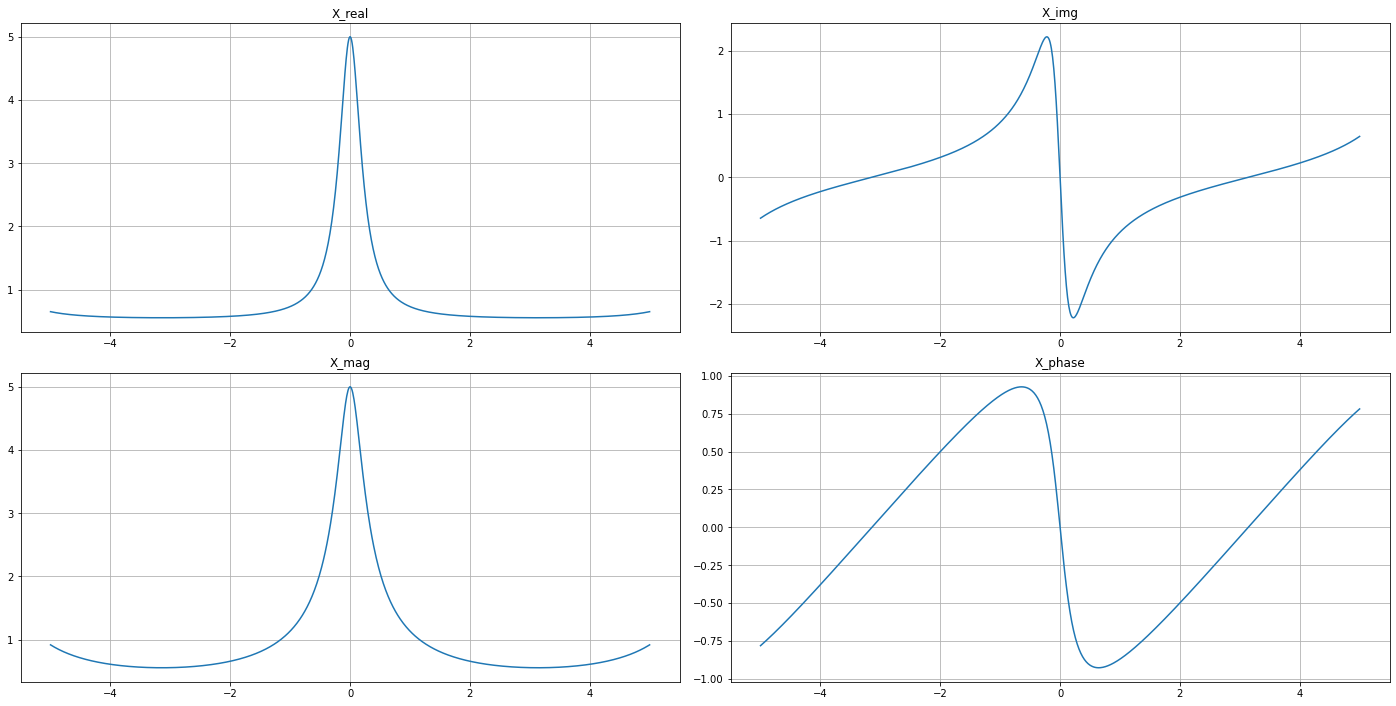

In [7]:
def fn(a,w):
    f = 1 - (a*np.exp(-1j*w))
    return 1/f

a = 0.8
w = np.linspace(-5,5,1000)
x = fn(a,w)

real_x = x.real
imag_x = x.imag
mag_x = np.absolute(x)
phase_x = np.angle(x)

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.tight_layout(pad=2)
axes[0][0].plot(w,real_x)
axes[0][0].set_title("X_real")
axes[0][0].grid()

axes[0][1].plot(w,imag_x)
axes[0][1].set_title("X_img")
axes[0][1].grid()

axes[1][0].plot(w,mag_x)
axes[1][0].set_title("X_mag")
axes[1][0].grid()

axes[1][1].plot(w,phase_x)
axes[1][1].set_title("X_phase")
axes[1][1].grid()

## 5

C:\Users\Arshad\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


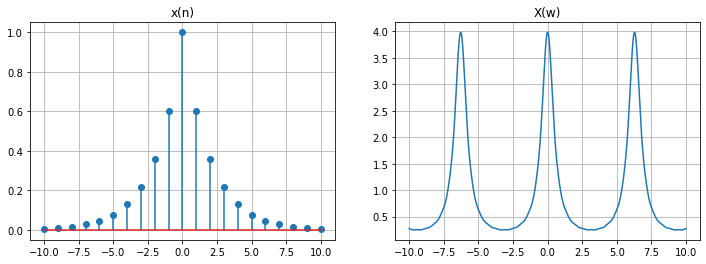

In [8]:
def fn(a,n):
    return a**(abs(n))

def fourier_transform(w):
    dtft = 0
    for i in range(-10,11):
        dtft += fn(0.6,i)*np.exp(-1j*w*i)
    return dtft

n = [i for i in range(-10,11)]
x = [fn(0.6,i) for i in n]

w = np.linspace(-10,10,2000)
x_w = [fourier_transform(i) for i in w]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].stem(n,x)
axes[0].set_title("x(n)")
axes[0].grid()

axes[1].plot(w,x_w)
axes[1].set_title("X(w)")
axes[1].grid() 

## 6(a)

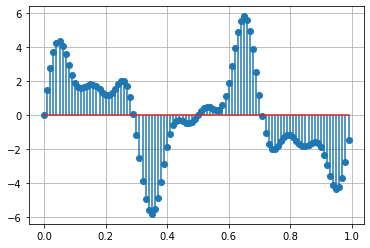

In [9]:
def sin_fn(a,freq,t):
    f = a*np.sin(2*np.pi*freq*t)
    return f

t = np.arange(0,1,0.01) # sampling rate = 100Hz 
x1 = np.array([sin_fn(3,2,i) for i in t])
x2 = np.array([sin_fn(2,5,i) for i in t])
x3 = np.array([sin_fn(1,8,i) for i in t])
x = x1 + x2 + x3

plt.stem(t,x)
plt.grid()

## 6(b)

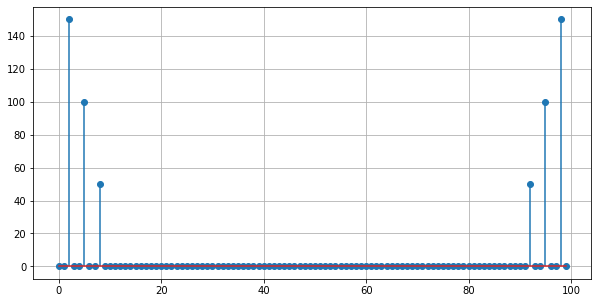

In [10]:
def DFT(x):
    N = len(x)
    ans = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft += x[n]*np.exp(-2j*np.pi*k*n/N)
        ans.append(dft)
    return ans

k = np.arange(0,100)
dft_x = DFT(x)
plt.figure(figsize=(10,5))
plt.stem(k,np.absolute(dft_x))
plt.grid()

## 6(c)

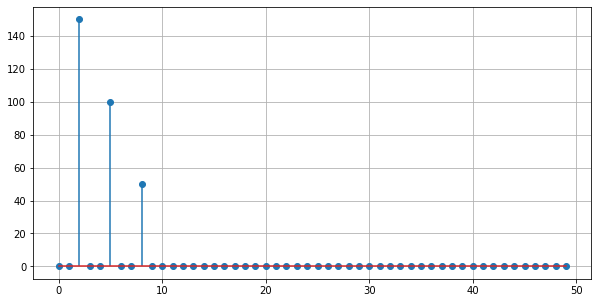

In [11]:
half_f = len(dft_x)//2
filtered_k = np.arange(half_f)
filtered_dft_x = dft_x[0:half_f]

plt.figure(figsize=(10,5))
plt.stem(filtered_k,np.absolute(filtered_dft_x))
plt.grid()

## 7(a)

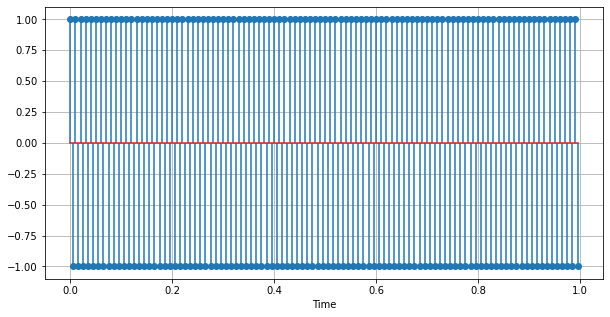

In [12]:
def sin_fn(f,phase,t):
    f = np.sin(2*np.pi*f*t+phase)
    return f

t7 = np.arange(0,1,1/200) # Sampling frequency 200 Hz
x7 = sin_fn(100,np.pi/2,t7) 

plt.figure(figsize=(10,5))
plt.stem(t7,x7)
plt.xlabel('Time')
plt.grid()


## 7(b)

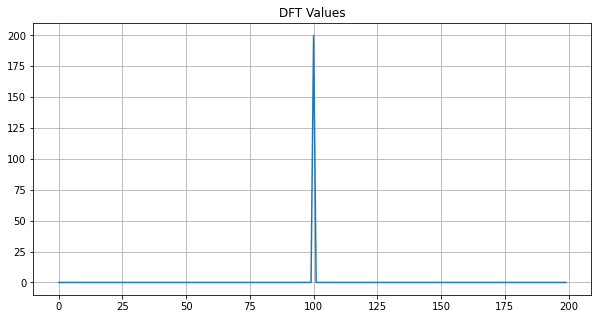

In [13]:
dft_x7 = DFT(x7)
k7 = np.arange(len(dft_x7))
plt.figure(figsize=(10,5))
plt.plot(k7,np.absolute(dft_x7))
plt.title('DFT Values')
plt.grid()

## 7(c)

In [14]:
def window_gen(n_samples,fs=200):
    n = np.arange(0,1,1/fs)
    val = []
    
    for i in n:
        if i>=(0.5-n_samples/(2*fs)) and i<(0.5+n_samples/(2*fs)):
            val.append(1)
        else:
            val.append(0)
            
    return (n,val)

In [15]:
window1 = window_gen(80)
window2 = window_gen(160)

## 7(d)

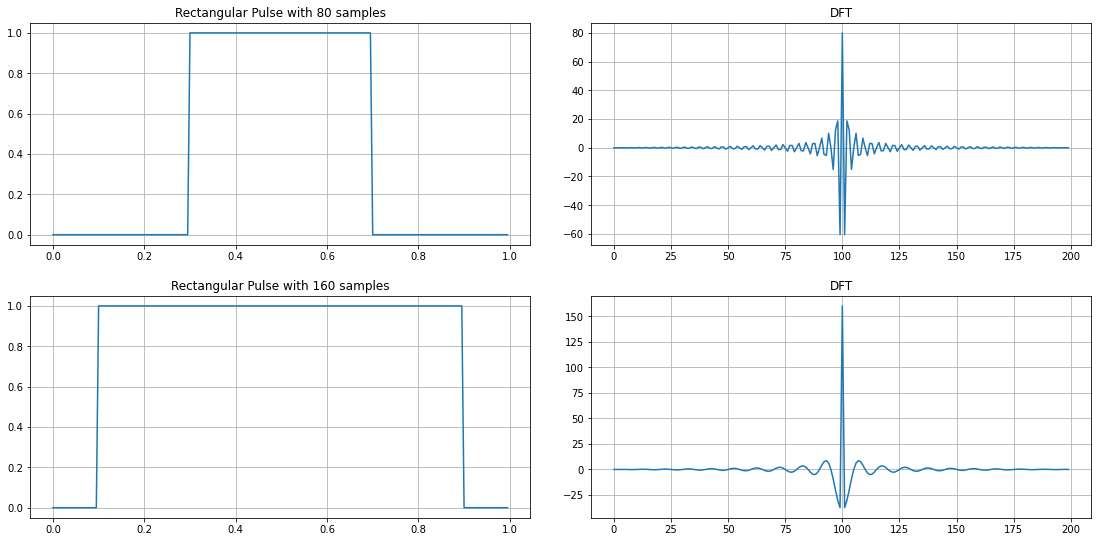

In [16]:
window1_dft = np.fft.fftshift(DFT(window1[1]))
window2_dft = np.fft.fftshift(DFT(window2[1]))

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
plt.tight_layout(pad=3)
axes[0][0].plot(window1[0],window1[1])
axes[0][0].set_title("Rectangular Pulse with 80 samples")
axes[0][0].grid()

axes[0][1].plot(window1_dft.real)
axes[0][1].set_title("DFT")
axes[0][1].grid()

axes[1][0].plot(window2[0],window2[1])
axes[1][0].set_title("Rectangular Pulse with 160 samples")
axes[1][0].grid()

axes[1][1].plot(window2_dft.real)
axes[1][1].set_title("DFT")
axes[1][1].grid()


**After observing the above 2 plots we can say that main lobe is dependent of number of samples taken, more the number of samples
smaller the width of main lobe. Side lobes are symmetric about center.**

## 7(e)

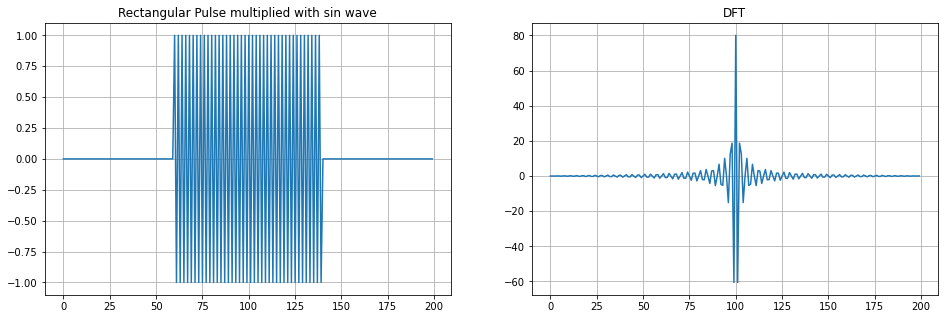

In [17]:
sin_windowed_1 = np.multiply(x7,window1[1])
sin_windowed_1_dft = np.fft.fft(sin_windowed_1)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(sin_windowed_1)
axes[0].set_title("Rectangular Pulse multiplied with sin wave")
axes[0].grid()

axes[1].plot(sin_windowed_1_dft.real)
axes[1].set_title("DFT")
axes[1].grid()

## 7(f)

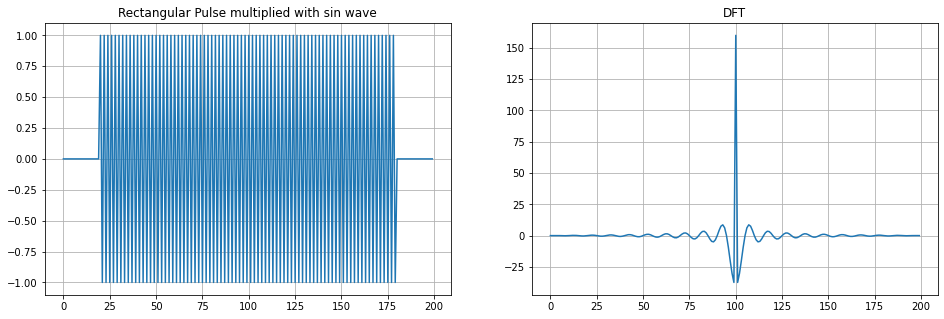

In [18]:
sin_windowed_2 = np.multiply(x7,window2[1])
sin_windowed_2_dft = np.fft.fft(sin_windowed_2)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(sin_windowed_2)
axes[0].set_title("Rectangular Pulse multiplied with sin wave")
axes[0].grid()

axes[1].plot(sin_windowed_2_dft.real)
axes[1].set_title("DFT")
axes[1].grid()

**When comparing with part(b) we notice that there is a impulse at 100 Hz which is frequency component present in original sin wave**